In [2]:
import pandas as pd

df = pd.read_csv('business.csv')
df.head()

,matricula,first_name,last_name,email,gender,profissao,salario
0,1,Cletis,Longhorne,clonghorne0@umn.edu,Male,Administrative Assistant IV,$3167.99
1,2,Brigham,Deaville,bdeaville1@amazon.co.uk,Male,Chemical Engineer,$9922.27
2,3,Janeva,NaN,jheinlein2@nih.gov,Bigender,Staff Scientist,$2626.98
3,4,Maynard,Stawell,mstawell3@4shared.com,Male,Clinical Specialist,$3211.06
4,5,Cosette,Cullabine,ccullabine4@ted.com,Female,Project Manager,$4864.50


Carregar e Visualizar os Dados
Desafio: Carregar a base de dados em um DataFrame e exibir as primeiras e últimas 5 linhas.
Objetivo: Entender a estrutura dos dados e verificar se há valores ausentes ou inconsistências.


In [3]:
ultimas_linhas = df.tail(5)
ultimas_linhas

,matricula,first_name,last_name,email,gender,profissao,salario
245,246,Hendrick,Heibel,hheibel6t@netscape.com,Male,Media Manager II,$9331.46
246,247,Wat,Glenn,wglenn6u@shareasale.com,Male,Web Designer IV,$11228.92
247,248,Maudie,Ashment,mashment6v@shutterfly.com,Female,Sales Associate,$16818.43
248,249,Darius,NaN,NaN,Male,Safety Technician II,$13528.86
249,250,Whit,Marrows,wmarrows6x@tripadvisor.com,Bigender,Budget/Accounting Analyst I,$17808.75


In [4]:
# Localizando celulas vazias
celulas_vazias = df.isna()


In [5]:
# Contando quantas células vazias possuem na base
soma_celulas_vazias = celulas_vazias.sum() # Por coluna
print(soma_celulas_vazias)

total_soma_celulas_vazias = soma_celulas_vazias.sum()
print(f'Possuimos um total de {total_soma_celulas_vazias} células vazias')

matricula      0
first_name     0
last_name     19
email         22
gender         0
profissao      0
salario        0
dtype: int64
Possuimos um total de 41 células vazias


In [6]:
# Subistituindo células vazias
df.fillna('não informado', inplace=True)

df

,matricula,first_name,last_name,email,gender,profissao,salario
0,1,Cletis,Longhorne,clonghorne0@umn.edu,Male,Administrative Assistant IV,$3167.99
1,2,Brigham,Deaville,bdeaville1@amazon.co.uk,Male,Chemical Engineer,$9922.27
2,3,Janeva,não informado,jheinlein2@nih.gov,Bigender,Staff Scientist,$2626.98
3,4,Maynard,Stawell,mstawell3@4shared.com,Male,Clinical Specialist,$3211.06
4,5,Cosette,Cullabine,ccullabine4@ted.com,Female,Project Manager,$4864.50
...,...,...,...,...,...,...,...
245,246,Hendrick,Heibel,hheibel6t@netscape.com,Male,Media Manager II,$9331.46
246,247,Wat,Glenn,wglenn6u@shareasale.com,Male,Web Designer IV,$11228.92
247,248,Maudie,Ashment,mashment6v@shutterfly.com,Female,Sales Associate,$16818.43
248,249,Darius,não informado,não informado,Male,Safety Technician II,$13528.86


Desafio: Gerar um resumo estatístico dos salários.

Objetivo: Obter informações como média, mediana, desvio padrão, valores máximos e mínimos, etc., para analisar a distribuição dos salários e idades.

In [7]:
# Como se trata de valor monetario precisamos remover o $ para podermos trabalhar com estatística
import pandas as pd

df = pd.read_csv('business.csv')

df['salario'] = df['salario'].replace({'\$': '', ',': ''}, regex=True).astype(float)



<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14264\600301918.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['salario'] = df['salario'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [8]:
# Gerando um resumo estatístico geral
resumo_Salarial = df['salario'].describe()
print(resumo_Salarial.count)


<bound method Series.count of count      250.000000
mean     10353.058360
std       5059.435079
min       1445.240000
25%       6121.485000
50%      10384.820000
75%      14770.210000
max      19149.240000
Name: salario, dtype: float64>


Vamos verificar quantas pessoas exercem cada cargo

In [ ]:
conta_duplicados = df['profissao'].value_counts()
print(conta_duplicados.to_string())


profissao
Graphic Designer                  5
Chief Design Engineer             5
Marketing Manager                 5
Sales Associate                   5
Assistant Professor               5
Chemical Engineer                 4
Junior Executive                  4
Staff Scientist                   4
Teacher                           4
Registered Nurse                  4
Structural Analysis Engineer      4
Senior Quality Engineer           4
Software Test Engineer III        4
Quality Control Specialist        4
Project Manager                   3
Clinical Specialist               3
Sales Representative              3
VP Product Management             3
Cost Accountant                   3
Administrative Officer            3
Help Desk Operator                3
Professor                         3
Food Chemist                      3
Desktop Support Technician        3
Research Associate                3
Assistant Manager                 3
Research Nurse                    3
Recruiter         

Distribuição de Salários por Departamento

Desafio: Calcular a média, o valor máximo e o valor mínimo dos salários por departamento.

Objetivo: Verificar quais departamentos estão pagando mais ou menos em média e encontrar possíveis discrepâncias salariais entre departamentos.


In [ ]:
# Filtrando por um departamento especifico
df_sales = df[df['profissao'] == 'Sales Associate']
media_df_sales = round(df_sales['salario'].mean(),2)
mediana_df_sales = round(df_sales['salario'].median(),2)
mode_df_sales = round(df_sales['salario'].mode())
media_df_sales, mediana_df_sales # 13506.72  17473.02   4535. 55

(np.float64(13506.72), np.float64(15160.05))

In [ ]:
# Filtrando por todos departamentos

salarios_por_departamento = df.groupby('profissao')['salario'].agg(
    media = 'mean',
    maximo = 'max',
    minimo = 'min'
).round(2)

# Ordenando por departamentos que possui uma media maior
salarios_por_departamento = salarios_por_departamento.sort_values(by='maximo', ascending=False)

print(salarios_por_departamento.to_string())

                                   media    maximo    minimo
profissao                                                   
Accounting Assistant I          19149.24  19149.24  19149.24
Human Resources Assistant I     10920.94  19045.89   2795.98
Research Associate              13498.70  19021.27   4290.39
Office Assistant II             18834.61  18834.61  18834.61
Business Systems Analyst        18637.46  18637.46  18637.46
Engineer III                    12520.24  18616.13   6424.34
Safety Technician II            16033.32  18537.79  13528.86
Executive Secretary             18507.15  18507.15  18507.15
Media Manager IV                18408.86  18408.86  18408.86
Compensation Analyst            14825.29  18389.65   8421.12
Automation Specialist IV        18350.39  18350.39  18350.39
Clinical Specialist             10640.31  18310.71   3211.06
Health Coach III                18278.57  18278.57  18278.57
Senior Financial Analyst        15554.68  18110.57  12998.79
Analog Circuit Design ma

In [12]:
df['email'] = df['email'].fillna('nao informado')
df['last_name'] = df['last_name'].fillna('nao informado')

Desafio: Filtrar os funcionários que ganham acima de um valor específico (por exemplo, R$10.000).

Objetivo: Identificar os funcionários que recebem salários mais altos e explorar suas características.

In [ ]:
# buscando salarios acima de 10.0000
salarios_maiores = df[df['salario'] > 10000]

print(salarios_maiores.to_string())


     matricula  first_name       last_name                             email       gender                      profissao   salario
6            7       Lenee         Peracco                 lperacco6@ask.com       Female                  Social Worker  17102.76
7            8       Blair           Esome               besome7@behance.net       Female         Administrative Officer  15199.50
9           10       Alvis            Boyd                   aboyd9@ucoz.com   Non-binary                 Health Coach I  15443.30
11          12   Nicolette          Hamson                     nao informado       Female            Assistant Professor  17568.62
15          16       Fiona          Ponton                 fpontonf@blog.com       Female    Mechanical Systems Engineer  14331.13
16          17      Hadria        Clemenzi                hclemenzig@cmu.edu       Female     Desktop Support Technician  10318.95
23          24        Moss          Dawton               mdawtonn@unicef.org       

Análise de Gênero e Salário

Desafio: Comparar a média de salários entre homens e mulheres.

Objetivo: Avaliar se existe uma disparidade salarial entre os gêneros.

In [ ]:
salarios_por_genero = df.groupby('gender')['salario'].agg(
    media = 'mean',
    maximo = 'max',
    minimo = 'min'
).round(2)

salarios_por_genero = salarios_por_genero.sort_values(by='media', ascending=False)
salarios_por_genero


,media,maximo,minimo
gender,,,
Non-binary,14221.94,18637.46,8585.05
Genderqueer,12437.05,18389.65,4266.69
Bigender,12151.33,17808.75,2626.98
Genderfluid,10860.33,15066.31,3931.96
Male,10296.55,19149.24,1654.55
Female,10184.91,18834.61,1515.05
Polygender,8950.55,17184.43,1445.24
Agender,5849.86,5849.86,5849.86


In [15]:
# Filtrando por um gênero específico, por exemplo: male
filtro_salarios = salarios_por_genero.loc['Agender']
print(filtro_salarios)

media     5849.86
maximo    5849.86
minimo    5849.86
Name: Agender, dtype: float64


Criando uma função que traz as estatísticas dos salários de forma aleatória

In [16]:
import random

# Transformando a coluna sexo em uma tupla
listGeneros = tuple(df['gender'].unique())

def filtro_por_genero_aleatorio(salarios_por_genero, generos):
    genero_aleatorio = random.choice(generos)
    filtro_salarios = salarios_por_genero.loc[genero_aleatorio]
    return genero_aleatorio, filtro_salarios

genero, filtro_salarios = filtro_por_genero_aleatorio(salarios_por_genero, listGeneros)

print(f'Gênero selecionado: {genero}')
print(f'Dados do gênero selecionado: \n{filtro_salarios}')


Gênero selecionado: Non-binary
Dados do gênero selecionado: 
media     14221.94
maximo    18637.46
minimo     8585.05
Name: Non-binary, dtype: float64


Top 5 Funcionários com Maiores Salários

Desafio: Encontrar os 5 funcionários com os maiores salários.

Objetivo: Identificar quem são os top 5 funcionários mais bem pagos e analisar suas características.

In [17]:
top_salarios = df.nlargest(5, 'salario')[['first_name', 'salario']]
top_salarios

,first_name,salario
119,Romeo,19149.24
228,Farr,19045.89
171,Lamond,19021.27
93,Kellie,18834.61
99,Paige,18637.46


Instalando o matplotlib para visualizar alguns dados importantes

In [18]:
! pip install matplotlib

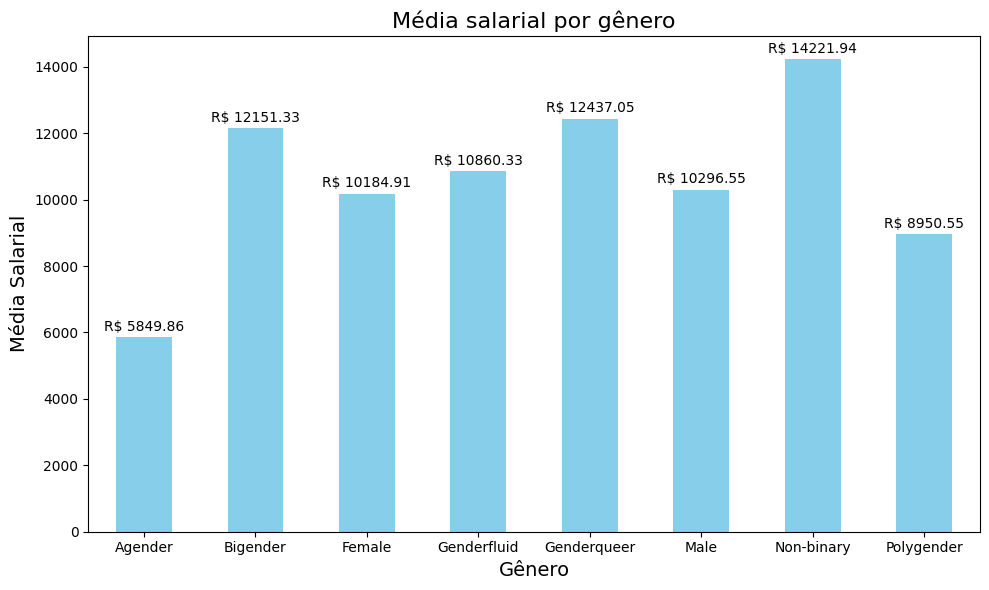

In [19]:
import matplotlib.pyplot as plt

media_salarial_genero = df.groupby('gender')['salario'].mean()

# criando gráficos de barras
plt.figure(figsize=(10, 6))
media_salarial_genero.plot(kind='bar', color='skyblue')

#adicionando títulos

plt.title('Média salarial por gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Média Salarial', fontsize=14)

plt.xticks(rotation = 0) # colando nomes na horizontal

for i, v in enumerate(media_salarial_genero):
    plt.text(i, v + 100, f'R$ {v:.2f}', ha='center', va='bottom', fontsize=10)  # Ajuste do valor acima da barra

plt.tight_layout()
plt.show()


Agora vamos trazer uma média salarial por cargo, nessa base de dados possuí muitos cargos então um gráfico com todos os cargos fica impossível de ler, vamos filtrar pelos top 10 caargos.

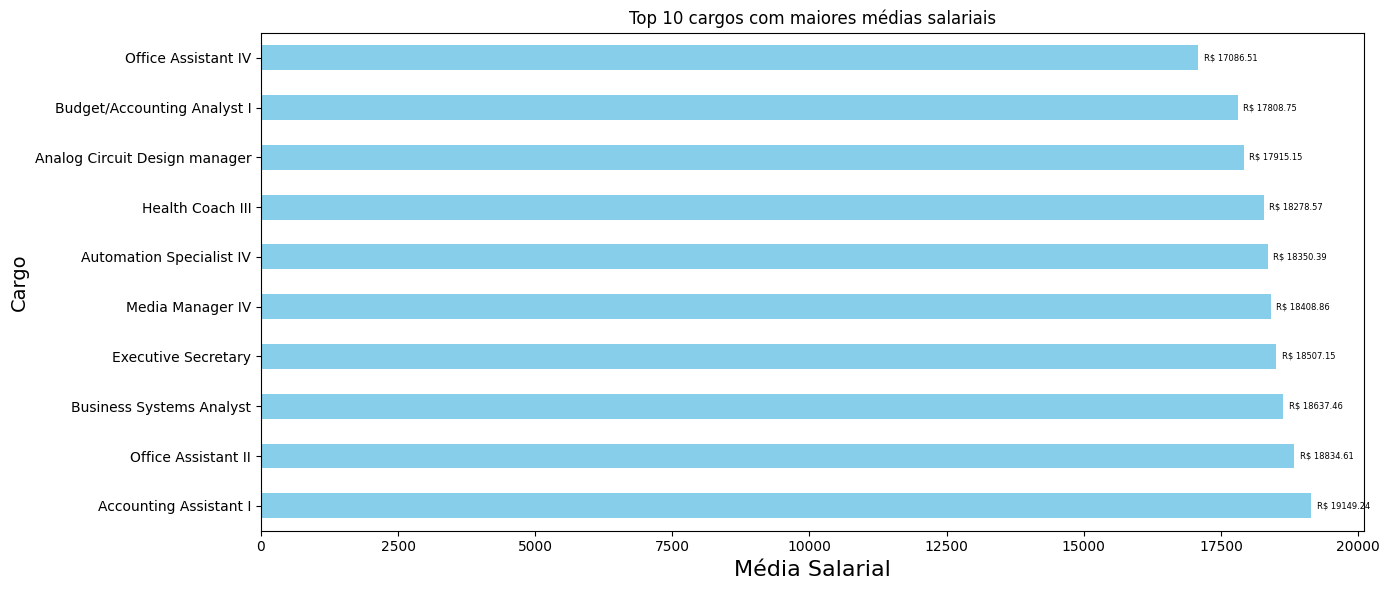

In [20]:
import matplotlib.pyplot as plt

# Calcular a média salarial por profissão
media_salarial_cargo = df.groupby('profissao')['salario'].mean()

# Selecionar os 8 cargos com maiores salários
top_10_salarios = media_salarial_cargo.sort_values(ascending=False).head(10)

# Criando gráfico de barras horizontais
plt.figure(figsize=(14, 6))
top_10_salarios.plot(kind='barh', color='skyblue')

# Adicionando títulos
plt.title('Top 10 cargos com maiores médias salariais')
plt.xlabel('Média Salarial', fontsize=16)
plt.ylabel('Cargo', fontsize=14)

# Adicionando os valores nas barras
for i, v in enumerate(top_10_salarios):
    plt.text(v + 100, i, f'R$ {v:.2f}', ha='left', va='center', fontsize=6)




plt.tight_layout()
plt.show()
